In [1]:
import pandas as pd
import numpy as np
import torch
import os
import sys
from tqdm import tqdm, trange

sys.path.append("../../")
import biked_commons
from biked_commons.rendering import rendering

from biked_commons.resource_utils import split_datasets_path

Using java as the Java binary


In [2]:
data = pd.read_csv(split_datasets_path("bike_bench.csv"), index_col=0)
display(data)

,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,FORK0R,...,Handlebar style OHCLASS: 2,Stem kind OHCLASS: 0,Stem kind OHCLASS: 1,Stem kind OHCLASS: 2,Fork type OHCLASS: 0,Fork type OHCLASS: 1,Fork type OHCLASS: 2,Seat tube type OHCLASS: 0,Seat tube type OHCLASS: 1,Seat tube type OHCLASS: 2
1,430.00,67.000000,608.32385,73.0000,135.6,45.0,588.7,72.500000,659.33480,45.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,350.00,-14.500000,476.78552,71.5000,80.0,45.0,265.0,71.500000,572.24335,45.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,415.00,4.000000,578.31660,72.0000,198.8,45.0,562.0,74.000000,647.08520,35.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,375.00,50.000000,480.25488,70.5000,91.8,40.0,460.0,73.500000,570.88070,45.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,431.79,24.000000,504.20746,72.1000,83.1,41.0,300.0,72.500000,635.54970,45.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,410.00,75.000000,589.23315,72.5000,145.0,125.0,520.0,74.000000,638.39355,45.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4797,419.00,42.909344,519.15990,65.7721,95.0,90.0,380.0,77.772100,702.45337,45.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4798,410.00,-11.500000,498.85727,72.0000,250.0,45.0,550.0,74.000000,547.74940,45.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4799,410.00,-11.500000,527.76940,72.0000,280.4,45.0,550.0,74.000534,542.19660,45.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
renderer = rendering.RenderingEngine(number_rendering_servers = 1, server_init_timeout_seconds=120)

Starting BikeCAD server on port 8080...
BikeCAD server started on port 8080.


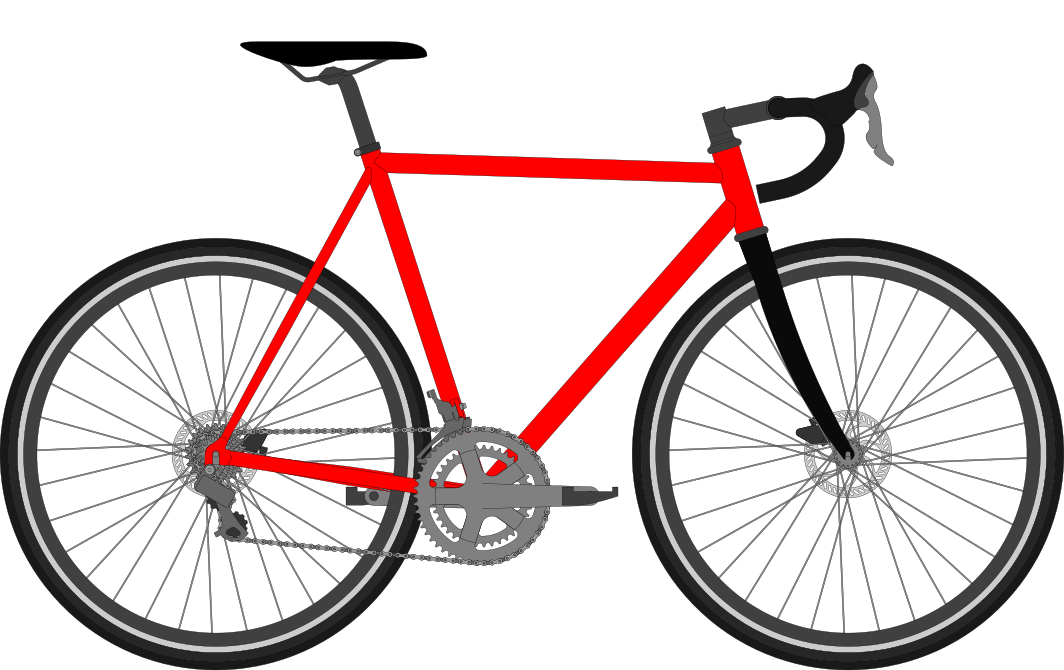

In [4]:
data1 = data.iloc[0]

res = renderer.render_clip(data1)
svg = res.image_bytes
from IPython.display import SVG, display
display(SVG(svg))